In [ ]:
!pip install keras --upgrade

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.datasets import fashion_mnist
from keras import models
from keras.layers import Dropout, GlobalAveragePooling2D, GaussianNoise, AveragePooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train = "/content/drive/MyDrive/Tec/Deep Learning/cats_and_dogs_small/train"
validation = "/content/drive/MyDrive/Tec/Deep Learning/cats_and_dogs_small/validation"
test = "/content/drive/MyDrive/Tec/Deep Learning/cats_and_dogs_small/test"

In [ ]:
classes = ["Cats", "Dogs"]

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_img = datagen.flow_from_directory(train, class_mode="categorical")
validation_img = datagen.flow_from_directory(validation)
test_img = datagen.flow_from_directory(test)

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1030 images belonging to 2 classes.


In [ ]:
opt = optimizers.Adam(learning_rate=0.01)

# Modelo 1 MobileNetV2

In [ ]:
model1 = Sequential()

trained_model1 =tf.keras.applications.MobileNetV2(
              input_shape=(256, 256, 3),
              alpha=1.0,
              include_top=False,
              weights="imagenet",
              input_tensor=None,
              pooling=None)

for layer in trained_model1.layers:
  layer.trainable = False

model1.add(trained_model1)
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(2, activation='softmax'))


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 81920)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                5242944   
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 7,501,058
Trainable params: 5,243,074
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model1.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  hist = model1.fit(train_img, validation_data = validation_img, epochs = 6)

Epoch 1/6
63/63 [==============================] - 114s 2s/step - loss: 0.1327 - accuracy: 0.9945 - val_loss: 0.7377 - val_accuracy: 0.9830
Epoch 2/6
63/63 [==============================] - 116s 2s/step - loss: 0.0867 - accuracy: 0.9945 - val_loss: 0.7767 - val_accuracy: 0.9820
Epoch 3/6
63/63 [==============================] - 115s 2s/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.8605 - val_accuracy: 0.9810
Epoch 4/6
63/63 [==============================] - 116s 2s/step - loss: 2.9061e-08 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 0.9810
Epoch 5/6
63/63 [==============================] - 115s 2s/step - loss: 2.6985e-08 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 0.9810
Epoch 6/6
63/63 [==============================] - 114s 2s/step - loss: 2.6688e-08 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 0.9810


In [ ]:
df = pd.DataFrame(hist.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.327091e-01,0.994527,0.737698,0.983
1,8.667787e-02,0.994527,0.776659,0.982
2,1.963895e-03,0.999502,0.860483,0.981
3,2.906062e-08,1.000000,0.859029,0.981
4,2.698489e-08,1.000000,0.859016,0.981


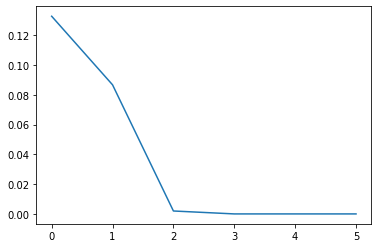

In [ ]:
plt.plot(hist.epoch, df.loss)
plt.show()

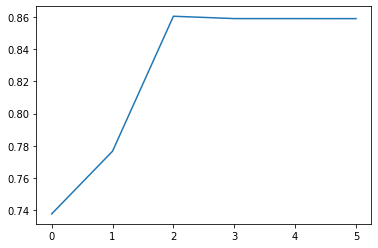

In [ ]:
plt.plot(hist.epoch, df.val_loss)
plt.show()

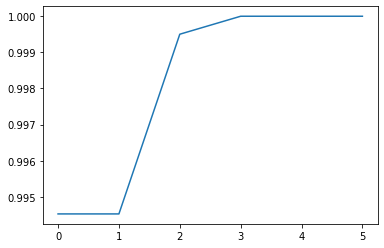

In [ ]:
plt.plot(hist.epoch, df.accuracy)
plt.show()

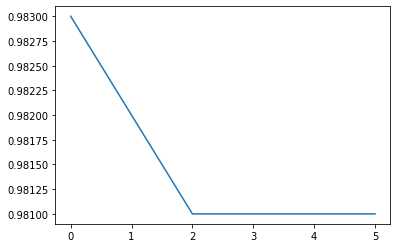

In [ ]:
plt.plot(hist.epoch, df.val_accuracy)
plt.show()

In [ ]:
val_loss, val_acc = model1.evaluate(test_img)
print(val_loss)
print(val_acc)

33/33 [==============================] - 396s 12s/step - loss: 0.8788 - accuracy: 0.9728
0.8788094520568848
0.9728155136108398


# Modelo 2 DenseNet121

In [ ]:
model2 = Sequential()

trained_model2 = tf.keras.applications.DenseNet121(
                  include_top=False,
                  weights="imagenet",
                  input_tensor=None,
                  input_shape=(256, 256, 3),
                  pooling=None,
                  classes=2,
                  classifier_activation="softmax")

for layer in trained_model2.layers:
  layer.trainable = False

model2.add(trained_model2)
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='softmax'))

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                4194368   
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 11,232,002
Trainable params: 4,194,498
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
model2.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  hist2 = model2.fit(train_img, validation_data = validation_img, epochs = 6)

Epoch 1/6
63/63 [==============================] - 571s 9s/step - loss: 50.0399 - accuracy: 0.9249 - val_loss: 6.0492 - val_accuracy: 0.9760
Epoch 2/6
63/63 [==============================] - 548s 9s/step - loss: 1.8864 - accuracy: 0.9856 - val_loss: 0.7583 - val_accuracy: 0.9800
Epoch 3/6
63/63 [==============================] - 541s 9s/step - loss: 0.1042 - accuracy: 0.9930 - val_loss: 0.2731 - val_accuracy: 0.9890
Epoch 4/6
63/63 [==============================] - 540s 9s/step - loss: 0.0407 - accuracy: 0.9955 - val_loss: 0.3377 - val_accuracy: 0.9890
Epoch 5/6
63/63 [==============================] - 547s 9s/step - loss: 0.0113 - accuracy: 0.9980 - val_loss: 0.3038 - val_accuracy: 0.9880
Epoch 6/6
63/63 [==============================] - 558s 9s/step - loss: 0.0026 - accuracy: 0.9980 - val_loss: 0.2930 - val_accuracy: 0.9880


In [ ]:
df = pd.DataFrame(hist2.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,50.039932,0.924876,6.049242,0.976
1,1.886419,0.985572,0.758324,0.980
2,0.104224,0.993035,0.273114,0.989
3,0.040721,0.995522,0.337675,0.989
4,0.011330,0.998010,0.303789,0.988


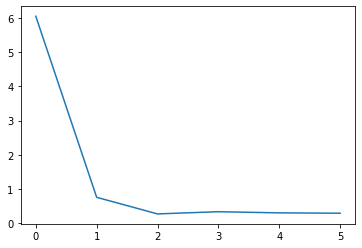

In [ ]:
plt.plot(hist2.epoch, df.val_loss)
plt.show()

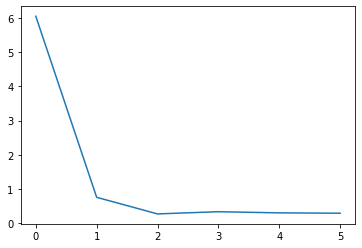

In [ ]:
plt.plot(hist2.epoch, df.val_loss)
plt.show()

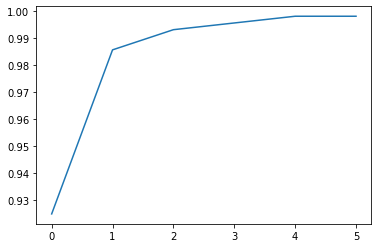

In [ ]:
plt.plot(hist2.epoch, df.accuracy)
plt.show()

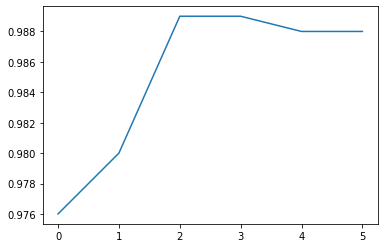

In [ ]:
plt.plot(hist2.epoch, df.val_accuracy)
plt.show()

In [ ]:
val_loss, val_acc = model2.evaluate(test_img)
print(val_loss)
print(val_acc)

33/33 [==============================] - 188s 6s/step - loss: 0.4616 - accuracy: 0.9835
0.4616062343120575
0.9834951162338257


# Modelo 3 EfficientNetB0

In [ ]:
model3 = Sequential()

trained_model3 = tf.keras.applications.EfficientNetB0(
                include_top=False,
                weights="imagenet",
                input_tensor=None,
                input_shape=(256, 256, 3),
                pooling=None)

for layer in trained_model3.layers:
  layer.trainable = False

model3.add(trained_model3)
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(2, activation='softmax'))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 81920)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                5242944   
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9,292,645
Trainable params: 5,243,074
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model3.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  hist3 = model3.fit(train_img, validation_data = validation_img, epochs = 6)

Epoch 1/6
63/63 [==============================] - 244s 4s/step - loss: 30.9351 - accuracy: 0.5055 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 2/6
63/63 [==============================] - 229s 4s/step - loss: 0.6944 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/6
63/63 [==============================] - 229s 4s/step - loss: 0.6935 - accuracy: 0.4856 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/6
63/63 [==============================] - 227s 4s/step - loss: 0.6936 - accuracy: 0.4965 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/6
63/63 [==============================] - 245s 4s/step - loss: 0.6934 - accuracy: 0.4896 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/6
63/63 [==============================] - 242s 4s/step - loss: 0.6935 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
df = pd.DataFrame(hist3.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,30.935097,0.505473,0.697717,0.5
1,0.694387,0.495522,0.693207,0.5
2,0.693526,0.485572,0.693148,0.5
3,0.693588,0.496517,0.693572,0.5
4,0.693391,0.489552,0.693188,0.5


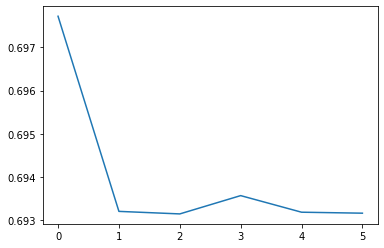

In [ ]:
plt.plot(hist3.epoch, df.val_loss)
plt.show()

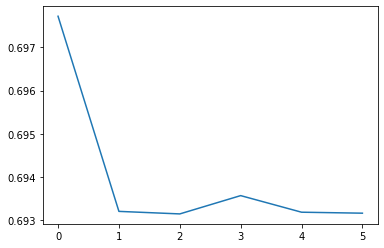

In [ ]:
plt.plot(hist3.epoch, df.val_loss)
plt.show()

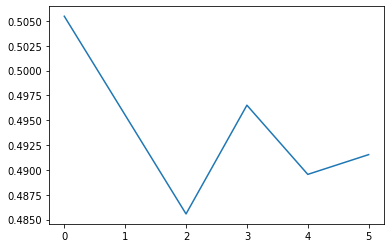

In [ ]:
plt.plot(hist3.epoch, df.accuracy)
plt.show()

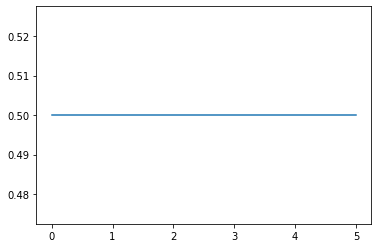

In [ ]:
plt.plot(hist3.epoch, df.val_accuracy)
plt.show()

In [ ]:
val_loss, val_acc = model3.evaluate(test_img)
print(val_loss)
print(val_acc)

33/33 [==============================] - 84s 3s/step - loss: 0.6930 - accuracy: 0.5146
0.6929899454116821
0.5145630836486816


-Report the accuracy for each model.  Which was the highest?

Modelo 2 DenseNet121

-Report the training and validation loss. Which was the lowest? Why?

Modelo 2 DenseNet121, la razón por la que este modelo fue el mejor, puede ser por como fue entrenado, la arquitectura, el diseño y en general, como fue creado este modelo desde el principio

-Make a conclusion about the task you have done.

Los modelos pueden variar bastante sus resultados, ya que aun teniendo más parámetros de entrenamiento en los otros modelos, el modelo 3 por ejemplo tiene más parámetros que el modelo 1 sin embargo el modelo 1 dio mejores resultados, esto puede demostrar que no es necesario como tal tener más para tener mejor precisión